In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn import datasets, svm

business = pd.read_csv(('data/yelp_academic_dataset_business.csv'))
checkin = pd.read_csv(('data/yelp_academic_dataset_checkin.csv'))
review = pd.read_csv(('data/yelp_academic_dataset_review.csv'))
tip = pd.read_csv(('data/yelp_academic_dataset_tip.csv'))
user = pd.read_csv(('data/yelp_academic_dataset_user.csv'))

/Applications/anaconda/lib/python2.7/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (6,7,11,25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


## Business Data Exploration

In [4]:
business.shape

(85901, 56)

In [2]:
business.head()

,attributes_Accepts Credit Cards,attributes_Accepts Insurance,attributes_Ages Allowed,attributes_Alcohol,attributes_Ambience,attributes_Attire,attributes_BYOB,attributes_BYOB/Corkage,attributes_By Appointment Only,attributes_Caters,...,hours_Wednesday,latitude,longitude,name,neighborhoods,open,review_count,stars,state,type
0,True,NaN,NaN,none,"{u'romantic': False, u'intimate': False, u'cla...",casual,NaN,NaN,NaN,False,...,"{u'close': u'21:00', u'open': u'11:00'}",40.354327,-79.900706,Mr Hoagie,NaN,True,7,3.5,PA,business
1,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,40.350553,-79.886814,Clancy's Pub,NaN,True,5,3.0,PA,business
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,40.354116,-80.014660,Cool Springs Golf Center,NaN,False,5,2.5,PA,business
3,True,NaN,NaN,full_bar,"{u'romantic': False, u'intimate': False, u'cla...",casual,NaN,NaN,NaN,True,...,"{u'close': u'19:00', u'open': u'10:00'}",40.408830,-79.866211,Emil's Lounge,NaN,True,26,4.5,PA,business
4,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"{u'close': u'20:00', u'open': u'11:00'}",40.403405,-79.855782,Grand View Golf Club,NaN,True,3,5.0,PA,business


In [3]:
list(business.columns.values)

['attributes_Accepts Credit Cards',
 'attributes_Accepts Insurance',
 'attributes_Ages Allowed',
 'attributes_Alcohol',
 'attributes_Ambience',
 'attributes_Attire',
 'attributes_BYOB',
 'attributes_BYOB/Corkage',
 'attributes_By Appointment Only',
 'attributes_Caters',
 'attributes_Coat Check',
 'attributes_Corkage',
 'attributes_Delivery',
 'attributes_Dietary Restrictions',
 'attributes_Dogs Allowed',
 'attributes_Drive-Thru',
 'attributes_Good For',
 'attributes_Good For Dancing',
 'attributes_Good For Groups',
 'attributes_Good for Kids',
 'attributes_Hair Types Specialized In',
 'attributes_Happy Hour',
 'attributes_Has TV',
 'attributes_Music',
 'attributes_Noise Level',
 'attributes_Open 24 Hours',
 'attributes_Order at Counter',
 'attributes_Outdoor Seating',
 'attributes_Parking',
 'attributes_Price Range',
 'attributes_Smoking',
 'attributes_Take-out',
 'attributes_Takes Reservations',
 'attributes_Waiter Service',
 'attributes_Wheelchair Accessible',
 'attributes_Wi-Fi',
 '

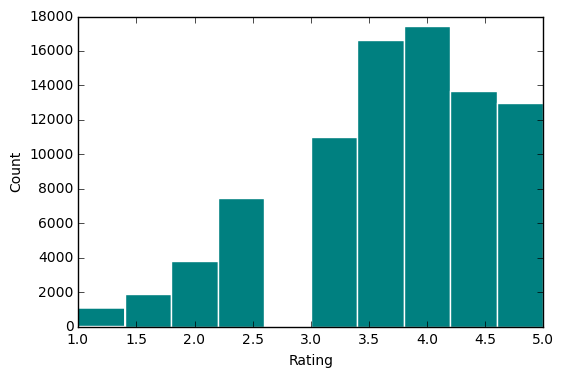

In [21]:
plt.hist(business.stars, color='#008080', edgecolor='white')
plt.xlabel("Rating")
plt.ylabel("Count")

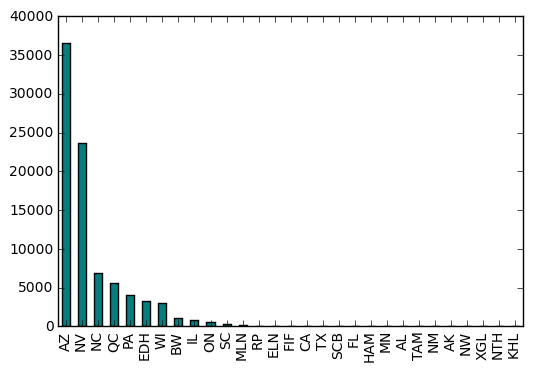

In [35]:
business.state.value_counts().plot(kind='bar',color='#008080')

## Checkin Data Exploration

In [5]:
checkin.shape

(61049, 170)

In [7]:
checkin.head()

,business_id,checkin_info_0-0,checkin_info_0-1,checkin_info_0-2,checkin_info_0-3,checkin_info_0-4,checkin_info_0-5,checkin_info_0-6,checkin_info_1-0,checkin_info_1-1,...,checkin_info_8-5,checkin_info_8-6,checkin_info_9-0,checkin_info_9-1,checkin_info_9-2,checkin_info_9-3,checkin_info_9-4,checkin_info_9-5,checkin_info_9-6,type
0,cE27W9VPgO88Qxe4ol6y_g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,checkin
1,mVHrayjG3uZ_RLHkLj-AMg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3,2,NaN,checkin
2,mYSpR_SLPgUVymYOvTQd_Q,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,checkin
3,KayYbHCt-RkbGcPdGOThNg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1,NaN,NaN,5,NaN,NaN,checkin
4,b12U9TFESStdy7CsTtcOeg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,checkin


In [8]:
list(checkin.columns.values)

['business_id',
 'checkin_info_0-0',
 'checkin_info_0-1',
 'checkin_info_0-2',
 'checkin_info_0-3',
 'checkin_info_0-4',
 'checkin_info_0-5',
 'checkin_info_0-6',
 'checkin_info_1-0',
 'checkin_info_1-1',
 'checkin_info_1-2',
 'checkin_info_1-3',
 'checkin_info_1-4',
 'checkin_info_1-5',
 'checkin_info_1-6',
 'checkin_info_10-0',
 'checkin_info_10-1',
 'checkin_info_10-2',
 'checkin_info_10-3',
 'checkin_info_10-4',
 'checkin_info_10-5',
 'checkin_info_10-6',
 'checkin_info_11-0',
 'checkin_info_11-1',
 'checkin_info_11-2',
 'checkin_info_11-3',
 'checkin_info_11-4',
 'checkin_info_11-5',
 'checkin_info_11-6',
 'checkin_info_12-0',
 'checkin_info_12-1',
 'checkin_info_12-2',
 'checkin_info_12-3',
 'checkin_info_12-4',
 'checkin_info_12-5',
 'checkin_info_12-6',
 'checkin_info_13-0',
 'checkin_info_13-1',
 'checkin_info_13-2',
 'checkin_info_13-3',
 'checkin_info_13-4',
 'checkin_info_13-5',
 'checkin_info_13-6',
 'checkin_info_14-0',
 'checkin_info_14-1',
 'checkin_info_14-2',
 'checki

## Review Data Exploration

In [9]:
review.head()

,business_id,date,review_id,stars,text,type,user_id,votes_cool,votes_funny,votes_useful
0,5UmKMjUEUNdYWqANhGckJw,2012-08-01,Ya85v4eqdd6k9Od8HbQjyA,4,"Mr Hoagie is an institution. Walking in, it do...",review,PUFPaY9KxDAcGqfsorJp3Q,0,0,0
1,5UmKMjUEUNdYWqANhGckJw,2014-02-13,KPvLNJ21_4wbYNctrOwWdQ,5,Excellent food. Superb customer service. I mis...,review,Iu6AxdBYGR4A0wspR9BYHA,0,0,0
2,5UmKMjUEUNdYWqANhGckJw,2015-10-31,fFSoGV46Yxuwbr3fHNuZig,5,Yes this place is a little out dated and not o...,review,auESFwWvW42h6alXgFxAXQ,0,1,1
3,5UmKMjUEUNdYWqANhGckJw,2015-12-26,pVMIt0a_QsKtuDfWVfSk2A,3,PROS: Italian hoagie was delicious. Friendly ...,review,qiczib2fO_1VBG8IoCGvVg,0,0,0
4,5UmKMjUEUNdYWqANhGckJw,2016-04-08,AEyiQ_Y44isJmNbMTyoMKQ,2,First the only reason this place could possibl...,review,qEE5EvV-f-s7yHC0Z4ydJQ,0,0,1


In [38]:
review.describe()
# may want to replace 0s with NAs

,stars,votes_cool,votes_funny,votes_useful
count,2685067.000000,2685065.000000,2685065.000000,2685065.000000
mean,3.764207,0.538977,0.431059,1.006813
std,1.390084,1.781651,1.580670,2.233418
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,0.000000,0.000000
75%,5.000000,1.000000,0.000000,1.000000
max,5.000000,153.000000,151.000000,168.000000


In [39]:
# probably best to flag those 0 data as NAN
review.votes_cool[review.votes_cool==0] = np.NaN
review.votes_funny[review.votes_funny==0] = np.NaN
review.votes_useful[review.votes_useful==0] = np.NaN

/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [40]:
review.describe()

,stars,votes_cool,votes_funny,votes_useful
count,2685067.000000,695313.000000,548208.000000,1170566.000000
mean,3.764207,2.081346,2.111283,2.309445
std,1.390084,3.007956,2.947892,2.904061
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,1.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,1.000000
75%,5.000000,2.000000,2.000000,3.000000
max,5.000000,153.000000,151.000000,168.000000


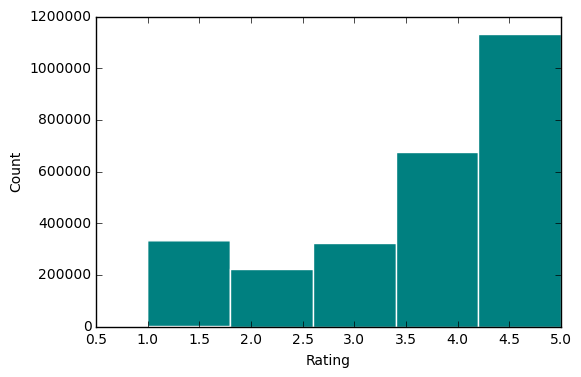

In [48]:
plt.hist(review.stars, color='#008080', edgecolor='white', bins=5)
plt.xlabel("Rating")
plt.ylabel("Count")

## Tip Data Exploration

In [12]:
tip.head()

,business_id,date,likes,text,type,user_id
0,5UmKMjUEUNdYWqANhGckJw,2016-07-17,0,Pizza is garbage. Hoagies are excellent.,tip,ZxdojCZgZhw36xuSGaryRg
1,cE27W9VPgO88Qxe4ol6y_g,2013-04-18,0,Don't waste your time.,tip,-6rEfobYjMxpUWLNxszaxQ
2,mVHrayjG3uZ_RLHkLj-AMg,2016-02-22,0,Not easy to find. Be sure to put in directions...,tip,5OumCBQ_MyQsltSdbMyunA
3,mVHrayjG3uZ_RLHkLj-AMg,2013-01-06,1,Your GPS will not allow you to find this place...,tip,EZ0r9dKKtEGVx2CdnowPCw
4,KayYbHCt-RkbGcPdGOThNg,2013-12-03,0,Great drink specials!,tip,xb6zEQCw9I-Gl0g06e1KsQ


## User Data Exploration

In [13]:
user.head()

,average_stars,compliments_cool,compliments_cute,compliments_funny,compliments_hot,compliments_list,compliments_more,compliments_note,compliments_photos,compliments_plain,...,fans,friends,name,review_count,type,user_id,votes_cool,votes_funny,votes_useful,yelping_since
0,4.14,76,15,11,48,NaN,3,20,14,25,...,69,"[,u,',r,p,O,y,q,D,_,8,9,3,c,q,m,D,A,t,J,L,b,d,...",Russel,108,user,18kPq7GPye-YQ3LyKyAZPw,246,167,282,2004-10
1,3.67,1675,204,594,1111,38,137,611,361,970,...,1345,"[,u,',1,8,k,P,q,7,G,P,y,e,-,Y,Q,3,L,y,K,y,A,Z,...",Jeremy,1292,user,rpOyqD_893cqmDAtJLbdog,12091,8399,15242,2004-10
2,3.68,134,22,96,99,4,18,79,27,86,...,105,"[,u,',1,8,k,P,q,7,G,P,y,e,-,Y,Q,3,L,y,K,y,A,Z,...",Michael,395,user,4U9kSBLuBDU391x6bxU-YA,657,722,1349,2004-10
3,4.64,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,"[,u,',1,8,k,P,q,7,G,P,y,e,-,Y,Q,3,L,y,K,y,A,Z,...",Ken,11,user,fHtTaujcyKvXglE33Z5yIw,5,1,11,2004-10
4,3.80,1,2,NaN,1,NaN,1,1,NaN,2,...,5,"[,u,',r,p,O,y,q,D,_,8,9,3,c,q,m,D,A,t,J,L,b,d,...",Katherine,66,user,SIBCL7HBkrP4llolm4SC2A,16,13,37,2004-10


In [14]:
list(user.columns.values)

['average_stars',
 'compliments_cool',
 'compliments_cute',
 'compliments_funny',
 'compliments_hot',
 'compliments_list',
 'compliments_more',
 'compliments_note',
 'compliments_photos',
 'compliments_plain',
 'compliments_profile',
 'compliments_writer',
 'elite',
 'fans',
 'friends',
 'name',
 'review_count',
 'type',
 'user_id',
 'votes_cool',
 'votes_funny',
 'votes_useful',
 'yelping_since']

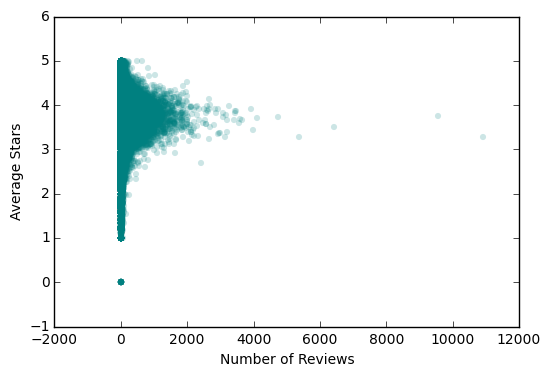

In [57]:
plt.scatter(user.review_count, user.average_stars, lw=0, alpha=.2, color='#008080')
plt.xlabel("Number of Reviews")
plt.ylabel("Average Stars")

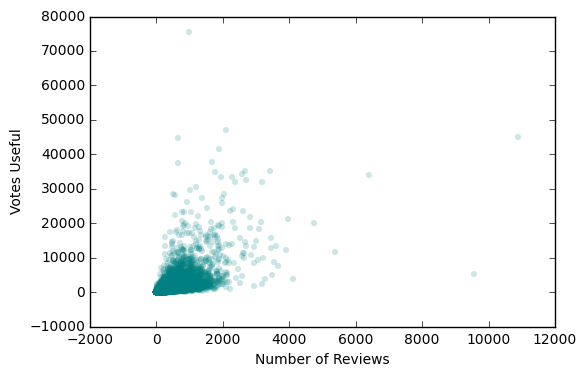

In [58]:
plt.scatter(user.review_count, user.votes_useful, lw=0, alpha=.2, color='#008080')
plt.xlabel("Number of Reviews")
plt.ylabel("Votes Useful")

# Merging Biz Subset to Reviews Data

In [2]:
biz_subset = pd.read_csv(('data/biz_subset.csv'))

In [3]:
data = pd.merge(biz_subset, review, on='business_id')
data.head()

,Unnamed: 0,attributes_Accepts Credit Cards,attributes_Accepts Insurance,attributes_Ages Allowed,attributes_Alcohol,attributes_Ambience,attributes_Attire,attributes_BYOB,attributes_BYOB/Corkage,attributes_By Appointment Only,...,type_x,date,review_id,stars_y,text,type_y,user_id,votes_cool,votes_funny,votes_useful
0,1,True,NaN,NaN,full_bar,"{u'romantic': False, u'intimate': False, u'tou...",casual,NaN,NaN,NaN,...,business,2012-08-06,IhLPy_qJqRyGb_vGwHNeaQ,4,We decided on Sapporo after reading so-so revi...,review,e6GiLUdbUaPX7-P9QtHrXg,0,0,1
1,1,True,NaN,NaN,full_bar,"{u'romantic': False, u'intimate': False, u'tou...",casual,NaN,NaN,NaN,...,business,2013-04-22,qUkI_rNF-xpaQXqvdpb1hg,5,I travel a lot and have eaten at a lot of Hiba...,review,UANFI1i2-xcOVIU8DYBdkw,0,0,0
2,1,True,NaN,NaN,full_bar,"{u'romantic': False, u'intimate': False, u'tou...",casual,NaN,NaN,NaN,...,business,2014-02-15,S1ng7qqc0Q-OZIs62cwpyw,1,The food was alright. Not good. Not bad. And c...,review,6ZyqtV5nQPL2RjMhfHOxWQ,0,0,0
3,1,True,NaN,NaN,full_bar,"{u'romantic': False, u'intimate': False, u'tou...",casual,NaN,NaN,NaN,...,business,2014-07-26,9mVDyUano9-a-dIoOjTY3Q,5,"Sapporo is my favorite Japanese restaurant, pe...",review,5yC_sdGnYfXTX7Djp_4SVQ,0,0,2
4,1,True,NaN,NaN,full_bar,"{u'romantic': False, u'intimate': False, u'tou...",casual,NaN,NaN,NaN,...,business,2015-07-10,FxcalYSYxfrA9AOJq3xEzA,5,"Been to many hibachis, this one is very clean,...",review,hlpHSNcosmjXQ-gfGXFGRw,0,0,0


In [4]:
data.shape

(115682, 66)

In [ ]:
# data.to_csv('data.csv')